### SVM：支持向量机

- 与传统算法进行对比，看看SVM究竟能带来什么样的效果

- 软间隔的作用，这么复杂的算法肯定会导致过拟合现象，如何来进行解决呢？

- 核函数的作用，如果只是做线性分类，好像轮不到SVM登场了，核函数才是它的强大之处！

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

### 支持向量机带来的效果

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris=datasets.load_iris()
X=iris['data'][:, (2, 3)]
y=iris['target']

setosa_or_versicolor=(y==0)|(y==1)
X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]

svm_clf=SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)

D:\Programing\Anaconda3\envs\ml_env\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, defaultdict


SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[1.29411744 0.82352928]


(0.0, 5.5, 0.0, 2.0)

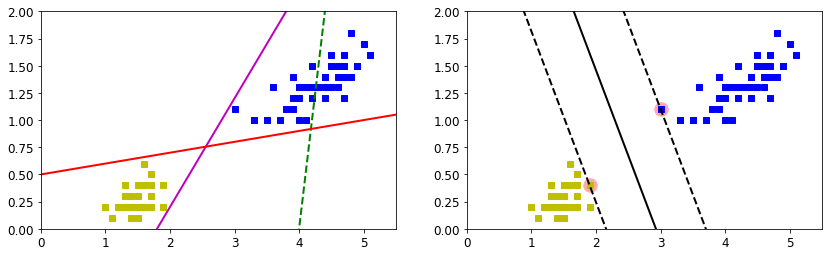

In [3]:
# 一般的模型
x0=np.linspace(0, 5.5, 200)
pred_1=5*x0-20
pred_2=x0-1.8
pred_3=0.1*x0+0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax, sv=True):
    w=svm_clf.coef_[0]
    b=svm_clf.intercept_[0]
    print(w)
    x0=np.linspace(xmin, xmax, 200)
    decision_boundary=-w[0]/w[1]*x0-b/w[1]
    margin=1/w[1]
    gutter_up=decision_boundary+margin
    gutter_down=decision_boundary-margin
    if sv:
        svs=svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-', linewidth=2)
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)

plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'ys')
plt.plot(x0, pred_1, 'g--', linewidth=2)
plt.plot(x0, pred_2, 'm-', linewidth=2)
plt.plot(x0, pred_3, 'r-', linewidth=2)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'ys')
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.axis([0, 5.5, 0, 2])

### 数据标准化的影响

![title](./img/v2.png)

### 软间隔

-如果不加入软间隔会遇到哪些问题呢？

![title](./img/v3.png)

可以使用超参数C控制软间隔程度：

In [4]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=datasets.load_iris()
X=iris['data'][:, (2, 3)]  # petal length, petal width
y=(iris['target']==2).astype(np.float64)  # iris-viginica

svm_clf=Pipeline([
    ('sacle', StandardScaler()),
    ('model', LinearSVC(C=1))
])
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('sacle', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

对比不同C值所带来的效果差异

In [6]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1,random_state = 42)
svm_clf2 = LinearSVC(C=100,random_state = 42)

scaled_svm_clf1 = Pipeline((
    ('std',scaler),
    ('linear_svc',svm_clf1)
))  

scaled_svm_clf2 = Pipeline((
    ('std',scaler),
    ('linear_svc',svm_clf2)
)) 
scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))])

In [7]:
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

[0.86561748 2.24558655]
[1.70812906 3.13972552]


(4.0, 6.0, 0.8, 2.8)

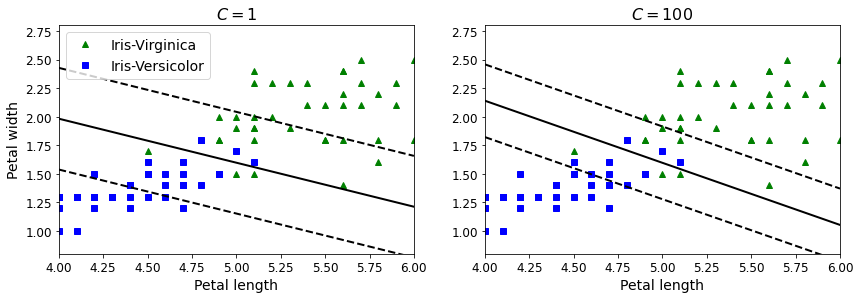

In [8]:
plt.figure(figsize=(14,4.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6,sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6,sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

- 在右侧，使用较高的C值，分类器会减少误分类，但最终会有较小间隔。
- 在左侧，使用较低的C值，间隔要大得多，但很多实例最终会出现在间隔之内。

### 非线性支持向量机

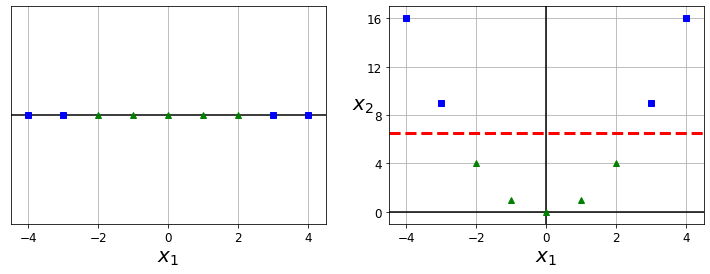

In [9]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))


plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])


plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

创建一份有点难度的数据

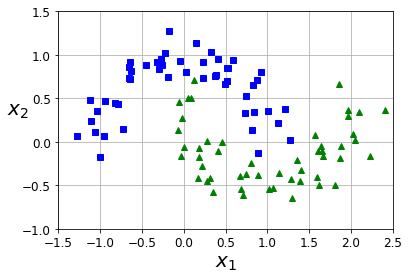

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf=Pipeline([
    ('poly', PolynomialFeatures(3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

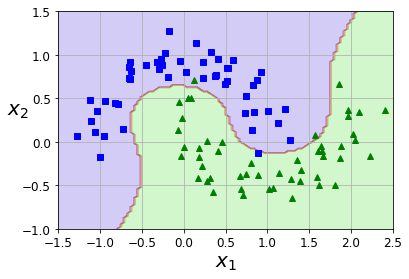

In [12]:
def plot_predictions(clf, axes):
    x0s=np.linspace(axes[0], axes[1], 100)
    x1s=np.linspace(axes[2], axes[3], 100)
    x0, x1=np.meshgrid(x0s, x1s)
    X=np.c_[x0.ravel(), x1.ravel()]
    y_pred=clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

    
plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

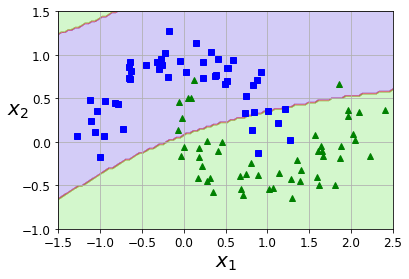

In [13]:
poly2_model=Pipeline([
    ('poly', PolynomialFeatures(2)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])
poly2_model.fit(X, y)

plot_predictions(poly2_model,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

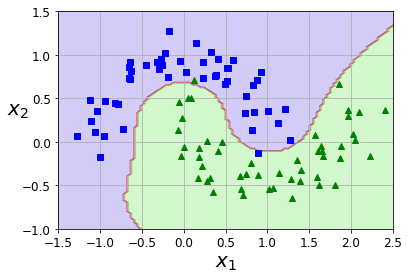

In [14]:
poly4_model=Pipeline([
    ('poly', PolynomialFeatures(4)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])
poly4_model.fit(X, y)

plot_predictions(poly4_model,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

### SVM中的核技巧

In [18]:
# coef0表示偏置项
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

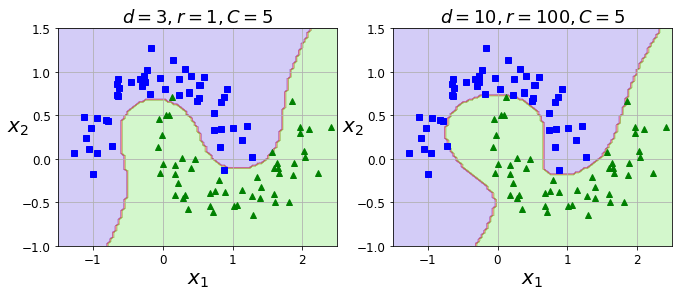

In [19]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

### 高斯核函数：
- 利用相似度来变换特征

* 选择一份一维数据集，并在 $x_1 = -2$ 和 $x_1 = 1$ 处为其添加两个高斯函数。
* 接下来，让我们将相似度函数定义为 $γ= 0.3$ 的径向基函数（RBF）

![title](./img/v5.png)

例如：**$x_1 = -1$** ：它位于距第一个地标距离为**1**的地方，距第二个地标距离为 **2**。因此，其新特征是 $x_2 = exp（-0.3×1^2）≈0.74$ 并且 $x_3 = exp（-0.3×2^2）≈0.30$。

![title](./img/v6.png)